In [1]:
# %loadpy /Users/alex/Documents/MyPython/doppler.py

In [2]:
import math
import numpy
import pylab


# the wavefront class will hold the location and time that a wavefront
# was emitted
class wavefront:

    def __init__ (self, x_emit, y_emit, w, t_emit):
        self.x_emit = x_emit
        self.y_emit = y_emit
        self.w      = w           # wave propagation speed
        self.t_emit = t_emit



def doppler():

    # emitter velocity (in x-direction)
    vel = 1.0

    # emitter initial coords
    x_init = 0.0
    y_init = 0.0

    # wave velocity
    w = 2.0

    # wave frequency (# of peaks per second)
    f = 3.0

    # maximum time
    tmax = 10.0
    dt = 0.01

    # create a list of wavefront objects that we can refer to when we
    # want to plot things.  There are f wavefronts emitted per second,
    # so the total number of wavefronts is tmax*f
    t = 0

    wavefronts = []
    while (t <= tmax):
        
        x_emit = x_init + vel*t
        y_emit = y_init

        wavefronts.append(wavefront(x_emit, y_emit, w, t))
        
        t += 1/f

        

    # debug -- try printing out the wave propagation info
    n = 0
    while (n < len(wavefronts)):
        print (n, wavefronts[n].x_emit, wavefronts[n].y_emit, wavefronts[n].t_emit)
        n += 1


    xmax = x_init + vel*tmax

    # we will be drawing circles, so make an array with the polar angle
    npts = 360
    theta = numpy.arange(npts)*2*math.pi/(npts-1)


    # step forward in time (by dt) and draw any wavefronts that have been emitted
    iframe = 0
    t = 0
    while (t <= tmax):

        pylab.clf()

        x_source = x_init + vel*t
        y_source = y_init

        # plot the sources's path
        pylab.plot([-1.2*xmax,1.2*xmax],[y_init,y_init],color='k')

        # draw the source
        pylab.scatter([x_source],[y_source], color='b')

        # loop over the wavefronts, and draw any that have been
        # emitted so far
        n = 0
        while (n < len(wavefronts)):

            if (wavefronts[n].t_emit > t):
                break

            r_front = wavefronts[n].w*(t - wavefronts[n].t_emit)

            # wavefronts are circles centered on their emitted coordinates
            x_front = wavefronts[n].x_emit + r_front*numpy.cos(theta)
            y_front = wavefronts[n].y_emit + r_front*numpy.sin(theta)
            
            pylab.plot(x_front, y_front, color='r')
            
            n += 1
            
        
        pylab.subplots_adjust(left=0,right=1.0,bottom=0,top=1.0)

        pylab.axis([-1.2*xmax,1.2*xmax,-1.2*xmax,1.2*xmax])
        pylab.axis("off")

        f = pylab.gcf()
        f.set_size_inches(5.0,5.0)

        # outfile = "doppler_%04d.png" % iframe
        # pylab.savefig(outfile)



        t += dt
        iframe += 1
    




0 0.0 0.0 0
1 0.3333333333333333 0.0 0.3333333333333333
2 0.6666666666666666 0.0 0.6666666666666666
3 1.0 0.0 1.0
4 1.3333333333333333 0.0 1.3333333333333333
5 1.6666666666666665 0.0 1.6666666666666665
6 1.9999999999999998 0.0 1.9999999999999998
7 2.333333333333333 0.0 2.333333333333333
8 2.6666666666666665 0.0 2.6666666666666665
9 3.0 0.0 3.0
10 3.3333333333333335 0.0 3.3333333333333335
11 3.666666666666667 0.0 3.666666666666667
12 4.0 0.0 4.0
13 4.333333333333333 0.0 4.333333333333333
14 4.666666666666666 0.0 4.666666666666666
15 4.999999999999999 0.0 4.999999999999999
16 5.333333333333332 0.0 5.333333333333332
17 5.666666666666665 0.0 5.666666666666665
18 5.999999999999998 0.0 5.999999999999998
19 6.333333333333331 0.0 6.333333333333331
20 6.666666666666664 0.0 6.666666666666664
21 6.999999999999997 0.0 6.999999999999997
22 7.33333333333333 0.0 7.33333333333333
23 7.666666666666663 0.0 7.666666666666663
24 7.9999999999999964 0.0 7.9999999999999964
25 8.33333333333333 0.0 8.333333333

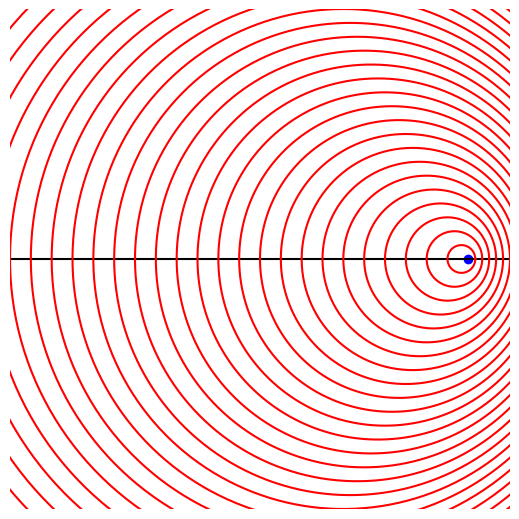

In [3]:
doppler()